In [1]:
from keras import layers



Using TensorFlow backend.


In [2]:
# 输入是第一个维度数是784的2D张量（第o轴是批量维度，大小没有指定，可以是任意输入值）,返回是一个张量
layer = layers.Dense(32, input_shape=(784,))  # 有32个输出单元的密集层

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

### keras工作流程
- 1.定义训练数据: 输入张量和目标张量
- 2.定义层组成的网络(或模型),将输入映射到目标
- 3.配置学习过程: 选择损失函数 优化器 和需要监控的指标
- 4.调用模型的fit方法在训练数据上进行迭代

### 定义模型的两种方法:
- 1.使用Sequential类定义的两层模型
- 2.函数式API

#### 1.方法1

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

#### 2.函数式API

In [10]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

### 模型定义好后，需要指定模型使用的优化器和损失函数/训练过程中想要监控的指标

In [11]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='mse', metrics=['accuracy'])

### 通过fit()方法将输入数据的数组传入模型

In [7]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

## 在云端AWS EC2运行深度学习任务优点和缺点
- 简单成本低，无需购买硬件
- 从长期看，价格很高

## 深度学习的最佳GPU
- 购买NVIDIA GPU
- 显卡推荐NVIDIA TITAN Xp/GTX 1060

## demo1电影评论分类:二分类问题

In [12]:
from keras.datasets import imdb



In [13]:
#加载数据集
# 仅保留训练集中的前10000个最常见的单词，低频的单词将会舍弃
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# train_data test_data都是评论组成的列表，每条评论又是单词索引组成的列表
# train_labels test_labels 都是0和1 组成的列表，0代表差评 1代表好评

In [14]:
train_data.shape  # 25000条评论

(25000,)

In [15]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [16]:
train_labels[24999]

0

In [17]:
max([max(sequence) for sequence in train_data])   # 单词的索引都不会超过10000，只统计训练集中前10000个单词

9999

In [18]:
word_index = imdb.get_word_index()  # 将一个单词映射为一个整数索引的字典
word_index

{"groom'": 70646,
 'captioned': 32695,
 'timeshifts': 87995,
 'athleticism': 21677,
 'bot': 35143,
 'apologists': 34348,
 'lidl': 72347,
 'outrun': 24848,
 'snipes': 7574,
 'horribly': 2354,
 'jealousy': 6578,
 'austreheim': 86997,
 "bakery's": 85418,
 'incitement': 47640,
 'unintrusive': 49418,
 'aulis': 57073,
 'criticise': 15203,
 "'country": 37016,
 'bushes': 16378,
 'realisation': 17640,
 'khrushchev': 44964,
 "zannetti's": 69231,
 'booz': 88512,
 'ramrodder': 46522,
 'shrills': 74935,
 'squirting': 25665,
 "'99": 43724,
 'evaporates': 32865,
 'depravity': 11752,
 'konchalovksy': 40427,
 'bomber': 11152,
 'polarised': 56015,
 'cables': 27507,
 'ossification': 59555,
 'ellipsis': 43626,
 'hyper': 6734,
 'observatory': 56936,
 'tsu': 73395,
 "'dress": 76841,
 'majestically': 44202,
 'trailer': 1469,
 'deserter': 81998,
 "brat's": 88261,
 'macfadyen': 71579,
 'curatola': 63641,
 'uttered': 10891,
 'theoretical': 20344,
 'founder': 17297,
 'worships': 18989,
 'showy': 13971,
 "christ'

In [19]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  # 键值颠倒，将整数索引映射为单词
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 将评论解码，将索引减去3,由于0,1,2是填充

In [20]:
# 准备数据

# 将整数序列编码为二进制矩阵
import numpy as np

def vectorize_squences(squences, dimension=10000):
    results = np.zeros((len(squences), dimension))
    for i, sequence in enumerate(squences):
        results[i, sequence] = 1.
        return results

In [21]:
# 将训练和测试数据向量化，采用one-hot编码

x_train = vectorize_squences(train_data)
x_test = vectorize_squences(test_data)
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [22]:
# 标签向量化
y_train = np.asarray((train_labels).astype('float32'))
y_test = np.asarray((test_labels).astype('float32'))
y_train[0]

1.0

In [28]:
# 构建网络

##模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
# 编译模型

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# 配置优化器

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# 使用自定义的损失和指标

from keras import losses
from keras import metrics


model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [32]:
# 留出验证集---------将原始训练数据留出10000个样本作为验证集合

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
#训练模型

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 8/20
15000/15000 [==============================] - 2s 

In [34]:
history_dict = history.history  # model.fit()方法返回一个history对象，调用此对象下的history方法，可以查看训练中的所有数据
history_dict.keys()  # 对应训练和测试中的监控指标

dict_keys(['val_loss', 'val_acc', 'acc', 'loss'])

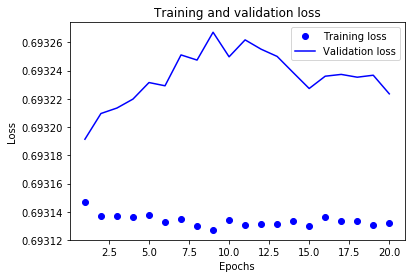

In [35]:
# 绘制训练损失和验证损失

import matplotlib.pyplot as plt

%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

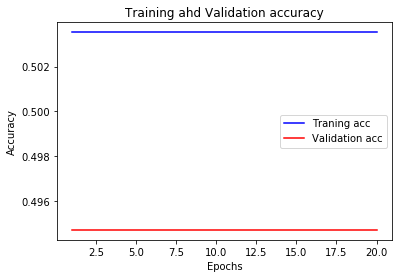

In [36]:
# 绘制训练精度和验证精度
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'b', label='Traning acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title("Training ahd Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

In [37]:
# 从头开始训练一个模型

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s - loss: 0.6932 - acc: 0.4985     
Epoch 2/4
25000/25000 [==============================] - 3s - loss: 0.6932 - acc: 0.4982     
Epoch 3/4
25000/25000 [==============================] - 3s - loss: 0.6932 - acc: 0.5000     
Epoch 4/4
24896/25000 [============================>.] - ETA: 0s

In [38]:
results

[0.69313981105804445, 0.5]

In [39]:
model.predict(x_test)

array([[ 0.67915189],
       [ 0.50153625],
       [ 0.50153625],
       ..., 
       [ 0.50153625],
       [ 0.50153625],
       [ 0.50153625]], dtype=float32)

### 二分类总结
- 通常需要对原始数据进行大量预处理，以便将其转换为张量输入到神经网络中。单词序列可以编码为二进制向量，但也有其他编码方式
- 带有relu激活的Dense层堆叠，可以解决很多种问题（包括情感分类），你可能会经常用到这种模型
- 对于二分类问题（两个输出类别），网络的最后一层应该是只有一个单元并使用sigmoid激活的Dense层，网络输出应该是0~1范围内的标量，表示概率值
- 对于二分类问题的 sigmoid 标量输出，你应该使用 binary_crossentropy 损失函数
- 无论你的问题是什么，rmsprop优化器通常都是足够好的选择
- 随着神经网络在训练数据上的表现越来越好，模型最终会过拟合，并在前所未见的数据上得到越来越差的结果,一定要一直监控模型在训练集之外的数据上的性能

# demo2:路透社新闻多分类
- 每个数据点只能划分到一个类别，就是单标签 多分类问题
- 每个数据点能划分到多个类别，就是多标签 多分类问题

In [ ]:
from keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [42]:
len(train_data)

8982

In [43]:
len(test_data)

2246

In [44]:
len(train_data[10])  # 每个样本都是由单词索引组成的列表

31

In [45]:
len(train_data[100])
# 将索引解锁为新闻文本
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [46]:
train_labels[0]  # 第3类

3

In [47]:
# 准备数据----编码数据
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [48]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [49]:
# 注意,Keras 内置方法可以实现上面这个操作
from keras.utils.np_utils import to_categorical

on_hot_train_labels = to_categorical(train_labels)
on_hot_test_labels = to_categorical(test_labels)

In [50]:
# 构建网络
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [51]:
# 编译模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [52]:
# 验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [53]:
# 训练模型

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3437 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1701 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.8678 - acc: 0.8167 - val_loss: 1.0794 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.7016 - acc: 0.8473 - val_loss: 0.9838 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.5662 - acc: 0.8795 - val_loss: 0.9403 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.4594 - acc: 0.9034 - val_loss: 0.9093 - val_acc: 0.8000
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.3709 - a

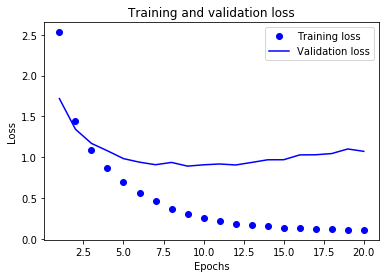

In [54]:
# 绘制训练损失和验证损失

import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

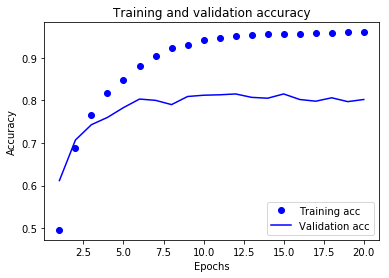

In [55]:
plt.clf()  # 清空图像

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
# 从头开始训练一个模型

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s - loss: 2.5420 - acc: 0.5227 - val_loss: 1.6826 - val_acc: 0.6520
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 1.3794 - acc: 0.7093 - val_loss: 1.2827 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 1s - loss: 1.0217 - acc: 0.7785 - val_loss: 1.1391 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s - loss: 0.8046 - acc: 0.8236 - val_loss: 1.0577 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s - loss: 0.6449 - acc: 0.8622 - val_loss: 0.9780 - val_acc: 0.7990
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.5163 - acc: 0.8913 - val_loss: 0.9144 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.4156 - acc: 0.9143 - val_loss: 0.8973 - val_acc: 0.8230
Epoch 8/9
7982/7982 [==============================] - 1s - loss: 0.3383 - acc: 0.92

In [57]:
results

[1.0259771005234757, 0.77738201251968353]

In [58]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [59]:
# 在新数据上生成预测结果

predictions = model.predict(x_test)
print(predictions.shape)
print(predictions[0].shape)
print(predictions[0])  # 每个元素是用softmax回归预测的每个类别的概率

(2246, 46)
(46,)
[  1.00912157e-05   1.19087592e-04   3.80152669e-05   9.67085600e-01
   2.03245990e-02   1.24851596e-07   9.15254059e-05   4.08356464e-05
   3.97624588e-03   2.98082500e-06   3.44860455e-05   1.38009386e-03
   6.02194596e-05   1.77831243e-05   5.43087026e-06   2.19215635e-05
   1.15143252e-03   2.09815858e-04   3.60974431e-04   1.12618390e-03
   1.12750195e-03   5.06756420e-04   7.14546013e-06   6.68171851e-05
   1.11685831e-05   2.58292886e-04   3.48107096e-06   2.50251378e-05
   7.10079530e-06   1.49521380e-04   2.88077543e-04   1.69506849e-04
   1.41954224e-05   5.92415308e-05   3.90965979e-05   2.33180090e-05
   1.80145420e-04   4.92993458e-05   1.33892376e-04   3.28474940e-04
   3.39655089e-05   4.16744500e-04   2.07335620e-06   2.53288690e-05
   6.93582251e-06   9.40958307e-06]


In [60]:
np.sum(predictions[0])  # predictions[0]所有元素的总和为1,因为概率总和为1

0.99999994

In [61]:
np.argmax(predictions[0])  # 获得概率最大值对应元素的索引值，即预测类别的结果

3

In [62]:
# 处理标签和损失的另一种方法

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# 对于上述的整数标签，可以使用sparse_categorical_crossentropy损失函数

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [63]:
# 中间层维度足够大的重要性

# 中间层的维度远远小于46,造成信息瓶颈

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
          


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s - loss: 1.7118 - acc: 0.6262 - val_loss: 1.1708 - val_acc: 0.7360
Epoch 2/20
7982/7982 [==============================] - 2s - loss: 0.9081 - acc: 0.7957 - val_loss: 1.0006 - val_acc: 0.7810
Epoch 3/20
7982/7982 [==============================] - 2s - loss: 0.5988 - acc: 0.8690 - val_loss: 0.8795 - val_acc: 0.8250
Epoch 4/20
7982/7982 [==============================] - 2s - loss: 0.4058 - acc: 0.9126 - val_loss: 0.8633 - val_acc: 0.8190
Epoch 5/20
7982/7982 [==============================] - 2s - loss: 0.2971 - acc: 0.9347 - val_loss: 0.9086 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 2s - loss: 0.2274 - acc: 0.9464 - val_loss: 1.0054 - val_acc: 0.7980
Epoch 7/20
7982/7982 [==============================] - 2s - loss: 0.1888 - acc: 0.9494 - val_loss: 0.9377 - val_acc: 0.8190
Epoch 8/20
7982/7982 [==============================] - 2s - loss: 0.1728 - a

### 多分类总结
- 如果要对N个类别的数据点进行分类，网络的最后一层应该是大小为N的Dense 层
- 对于单标签、多分类问题，网络的最后一层应该使用softmax激活，这样可以输出在N个输出类别上的概率分布。
- 这种问题的损失函数几乎总是应该使用分类交叉熵。它将网络输出的概率分布与目标的真实分布之间的距离最小化。
- 处理多分类问题的标签有两种方法：
    - 通过分类编码（也叫 one-hot 编码）对标签进行编码，然后使用 categorical_crossentropy 作为损失函数
    - 将标签编码为整数，然后使用 sparse_categorical_crossentropy 损失函数
- 如果你需要将数据划分到许多类别中，应该避免使用太小的中间层，以免在网络中造成信息瓶颈

# demo3预测房价：回归问题

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,
        14.4,  12.1,  17.9,  23.1,  19.9,  15.7,   8.8,  50. ,  22.5,
        24.1,  27.5,  10.9,  30.8,  32.9,  24. ,  18.5,  13.3,  22.9,
        34.7,  16.6,  17.5,  22.3,  16.1,  14.9,  23.1,  34.9,  25. ,
        13.9,  13.1,  20.4,  20. ,  15.2,  24.7,  22.2,  16.7,  12.7,
        15.6,  18.4,  21. ,  30.1,  15.1,  18.7,   9.6,  31.5,  24.8,
        19.1,  22. ,  14.5,  11. ,  32. ,  29.4,  20.3,  24.4,  14.6,
        19.5,  14.1,  14.3,  15.6,  10.5,   6.3,  19.3,  19.3,  13.4,
        36.4,  17.8,  13.5,  16.5,   8.3,  14.3,  16. ,  13.4,  28.6,
        43.5,  20.2,  22. ,  23. ,  20.7,  12.5,  48.5,  14.6,  13.4,
        23.7,  50. ,  21.7,  39.8,  38.7,  22.2,  34.9,  22.5,  31.1,
        28.7,  46. ,  41.7,  21. ,  26.6,  15. ,  24.4,  13.3,  21.2,
        11.7,  21.7,  19.4,  50. ,  22.8,  19.7,  24.7,  36.2,  14.2,
        18.9,  18.3,  20.6,  24.6,  18.2,   8.7,  44. ,  10.4,  13.2,
        21.2,  37. ,

In [5]:
# 数据归一化

mean = train_data.mean(axis=0)  # 求均值
train_data -= mean    # x-u
std = train_data.std(axis=0)  # 标准差delta
train_data /= std  # (x-u)/delta


In [6]:
# 模型定义

# mse均方误差： 预测值与目标值之间差的平方
# mae 平均绝对误差：预测值与目标值之间差的绝对值

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model 


### 利用K折交叉验证你的方法
- 可用数据划分为K个分区(通常为4/5)，实例化K个相同的模型，将每个模型在K-1个分区上训练，并在剩下的一个分区上进行评估。模型的验证分数等于k个验证分数的平均值。

In [7]:
# K折验证
import numpy as np

k = 4
num_val_samples = len(train_data) // k  # 地板除
num_epochs = 100
all_scores = []
for i in range(k):
    print('正在处理第{}折数据'.format(i))
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    # 准备训练数据
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

正在处理第0折数据
Instructions for updating:
keep_dims is deprecated, use keepdims instead
正在处理第1折数据
正在处理第2折数据
正在处理第3折数据


In [8]:
all_scores

[2.0734156452783266,
 2.4160672508844057,
 2.9433878164480229,
 2.3552650779780775]

In [ ]:
np.mean(all_scores)

In [10]:
# 保存每折的验证结果
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('正在处理第{}折数据'.format(i))
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    # 准备训练数据
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)  # verbose=0 静默模式
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    


正在处理第0折数据
正在处理第1折数据
正在处理第2折数据
正在处理第3折数据


In [14]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

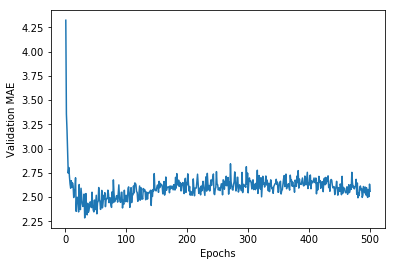

In [15]:
# 绘制验证分数

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

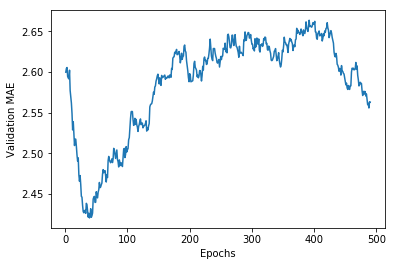

In [16]:
# 因为纵轴的范围较大，且数据方差相对较大，所以难以看清上图的规律
# 删除前 10 个数据点，因为它们的取值范围与曲线上的其他点不同
# 将每个数据点替换为前面数据点的指数移动平均值，以得到光滑的曲线
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
# 训练最终模型


model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

 32/102 [========>.....................] - ETA: 0s

2275.3690592447915

### 线性回归总结
- 回归问题使用的损失函数与分类问题不同。回归常用的损失函数是均方误差（ MSE）
- 回归问题使用的评估指标也与分类问题不同。显而易见，精度的概念不适用于回归问题。常见的回归指标是平均绝对误差（ MAE）
- 如果输入数据的特征具有不同的取值范围，应该先进行预处理，对每个特征单独进行缩放
- 如果可用的数据很少，使用 K 折验证可以可靠地评估模型
- 如果可用的训练数据很少，最好使用隐藏层较少（通常只有一到两个）的小型网络，以避免严重的过拟合

# 练习2总结
- 处理关于向量数据最常见的机器学习任务了：二分类问题、多分类问题和标量回归问题
- 在将原始数据输入神经网络之前，通常需要对其进行预处理
- 如果数据特征具有不同的取值范围，那么需要进行预处理，将每个特征单独缩放
- 随着训练的进行，神经网络最终会过拟合，并在前所未见的数据上得到更差的结果
- 如果训练数据不是很多，应该使用只有一两个隐藏层的小型网络，以避免严重的过拟合
- 如果数据被分为多个类别，那么中间层过小可能会导致信息瓶颈
- 回归问题使用的损失函数和评估指标都与分类问题不同
- 如果要处理的数据很少， K 折验证有助于可靠地评估模型